In [321]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets


# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

In [322]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [323]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def show_data(data_sample, size):
    plt.imshow(data_sample[0].numpy().reshape(size, size), cmap='gray')
    plt.title(f"Real Label = {labels[data_sample[1]]}")

In [324]:
class RandomSparse(object):
    """
    """

    def __init__(self):
        pass

    def __call__(self, sample):
        # image, label = sample['image'], sample['label']

        temp = (torch.rand(size=sample.shape) < 0.5).float()
        return sample*temp

        # return {'image': torch.multiply(image,temp), 'label': label}

In [325]:
class SingleClass(object):

    def __init__(self):
        pass
    def __call__(self, sample):


        return sample

In [326]:

IMAGE_SIZE = 24
#Generates an object to store multiple transformations

composed = transforms.Compose(
    [transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    SingleClass()
    ])

In [327]:
#Creating the two dataset objects and applying our transformations from above

dataset_train = dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
  
dataset_val = dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed,  download=True)

In [328]:
num = 9
dataset_train.targets[dataset_train.targets != num] = 1
dataset_train.targets[dataset_train.targets == num] = 0
dataset_val.targets[dataset_val.targets != num] = 1
dataset_val.targets[dataset_val.targets == num] = 0


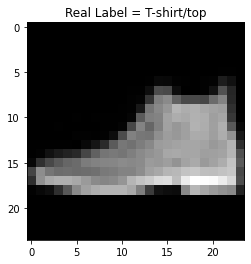

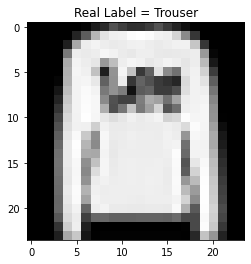

In [329]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample, IMAGE_SIZE)
    plt.show()
    if n==1:
        break 

In [330]:
#Every PyTorch model must inherit from torch.nn.Module
#nn.Module has very useful functions for models
class CNN(nn.Module):
    
    # Constructor: (out_1: Output channels of first CNN Layer), (out_2: Output channels of second CNN Layer), (number_of_classes: Number of classes to detect)
    def __init__(self, out_1=16, out_2=64, number_of_classes=10):
        super().__init__()
        #Create first Convolution Layer with input of 1 channel (grayscale) and output of out_1 channels
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)

        
        


        #Create a fully connected layer for the CNN. The input shape is the flattened convolution output. If output is (3, 28, 28), input is 28 * 28 * 3.
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)

        # Prediction (x is input)
	# The forward function is automatically called when we create an instance of the class and call it.
    def forward(self, x):
        x = self.cnn1(x)
     
        
        #Flattening cnn2's output and passing it into a fully connected layer
        # x = x.view(x.size(0), -1)
        x = self.flat(x)
        x = self.fc1(x)

In [331]:
#Data Loader for training data
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )

#Data Loader for validation data
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [332]:
#Creating the model
model = nn.Sequential(
    nn.Conv2d(1, 10, 3),
    nn.MaxPool2d(3,3),
    nn.ReLU(),

    nn.Flatten(),
    nn.Linear(490, 2)
)

#Creating an Adam optimizer with a learning rate of 0.002
optimizer = torch.optim.Adam(model.parameters(), lr = 0.002)

#Use Cross Entropy Loss since this is a classification problem
criterion = nn.CrossEntropyLoss()

In [333]:
# To show a progress bar while training
from tqdm import tqdm

training_acc_list=[]
val_acc_list=[]
N_test=len(dataset_val)
N_train = len(dataset_train)
n_epochs=5

for epoch in range(n_epochs):
    #Count how many predictions were correct
    correct = 0

    print()
    print(f"Epoch no. {epoch}")
    #Put model into training mode (uses Dropout if there are Dropout layers)
    model.train()
    #Loop over each sample in the dataloaders.
    for x, y in tqdm(train_loader):
        #Zero the optimizer gradients (PyTorch requires this.)
        optimizer.zero_grad()
        #Make a prediction
        y_hat = model(x)
        #Calculate the loss with the criterion
        loss = criterion(y_hat, y)
        #Initiate backpropagation/calculate derivatives of parameters with respect to the loss.
        loss.backward()
        #Update parameters
        optimizer.step()
        
        #Update correct counter
        #Grab the index of the AI's highest probability guess (Each output of model(x) is a tensor of probabilities) 
        correct += (torch.argmax(y_hat, 1) == y).sum().item()
        
    #Calculate accuracy
    accuracy = correct / N_train
    print("Training accuracy: " + str(accuracy))
    training_acc_list.append(accuracy)

    correct=0
    
    #Put model into validation mode (turns off Dropout if there are Dropout layers)
    model.eval()
    for x_test, y_test in test_loader:
        #Make a prediction
        z = model(x_test)
        #Grab the index of the AI's highest probability guess (Each output of model(x) is a tensor of probabilities) 
        y_hat = torch.argmax(z, 1)
        #Update correct counter if the prediction was correct
        correct += (y_hat == y_test).sum().item()
    accuracy = correct / N_test
    print("Validation accuracy: " + str(accuracy))
    val_acc_list.append(accuracy)


Epoch no. 0


100%|██████████| 600/600 [00:10<00:00, 58.42it/s]


Training accuracy: 0.9739666666666666
Validation accuracy: 0.9845

Epoch no. 1


100%|██████████| 600/600 [00:10<00:00, 58.20it/s]


Training accuracy: 0.9872
Validation accuracy: 0.9883

Epoch no. 2


100%|██████████| 600/600 [00:10<00:00, 58.17it/s]


Training accuracy: 0.98935
Validation accuracy: 0.9893

Epoch no. 3


100%|██████████| 600/600 [00:09<00:00, 60.10it/s]


Training accuracy: 0.9903833333333333
Validation accuracy: 0.9903

Epoch no. 4


100%|██████████| 600/600 [00:10<00:00, 59.83it/s]


Training accuracy: 0.9907166666666667
Validation accuracy: 0.9906


In [334]:
torch.cuda.is_available()

True

'Sequential(\n  (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))\n  (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)\n  (2): ReLU()\n  (3): Flatten(start_dim=1, end_dim=-1)\n  (4): Linear(in_features=490, out_features=2, bias=True)\n)'

In [335]:
# torch.save(model, 'models/model_9.pth')